# Boosting
- For regression Problem:  distribution="gaussian"
- For Binary classification: distribution="bernoulli"
- n.trees=5000 indicates that we want 5000 trees
- interaction.depth=4 limits the depth of each tree

,var,rel.inf
lstat,lstat,45.96792013
rm,rm,31.22018272
dis,dis,6.80567724
crim,crim,4.07534048
nox,nox,2.56586166
ptratio,ptratio,2.26983216
black,black,1.78740116
age,age,1.64495723
tax,tax,1.36917603
indus,indus,1.27052715


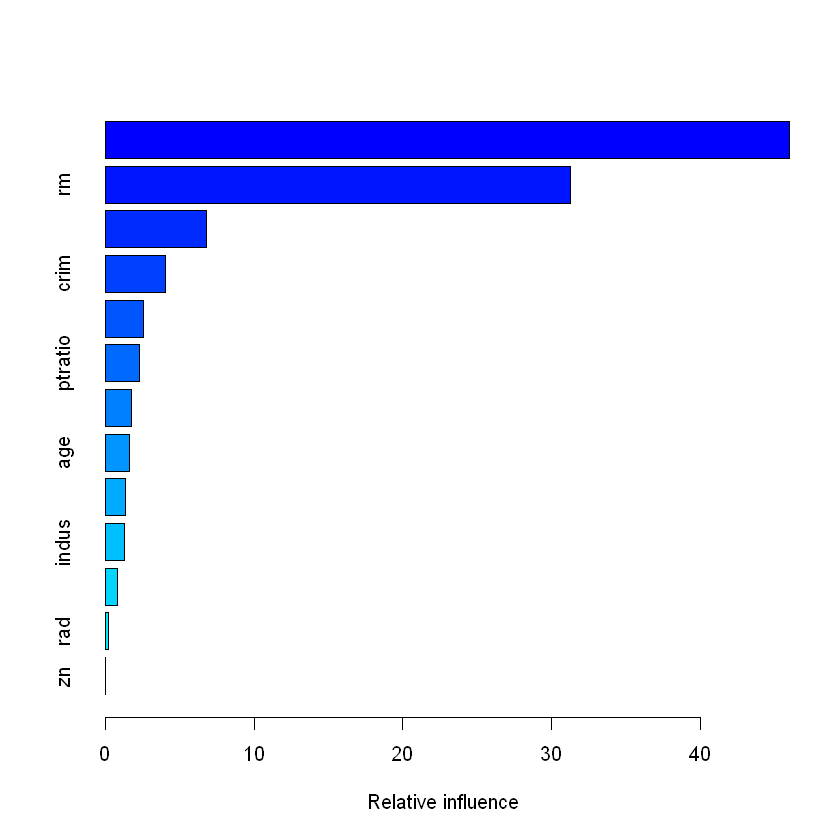

In [3]:
# gbm package
library(gbm)
library(MASS)
set.seed(1)
train=sample(1:nrow(Boston),nrow(Boston)/2)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)
# summary() function produces a relative influence plot and also outputs the relative influence statistics.
summary(boost.boston)


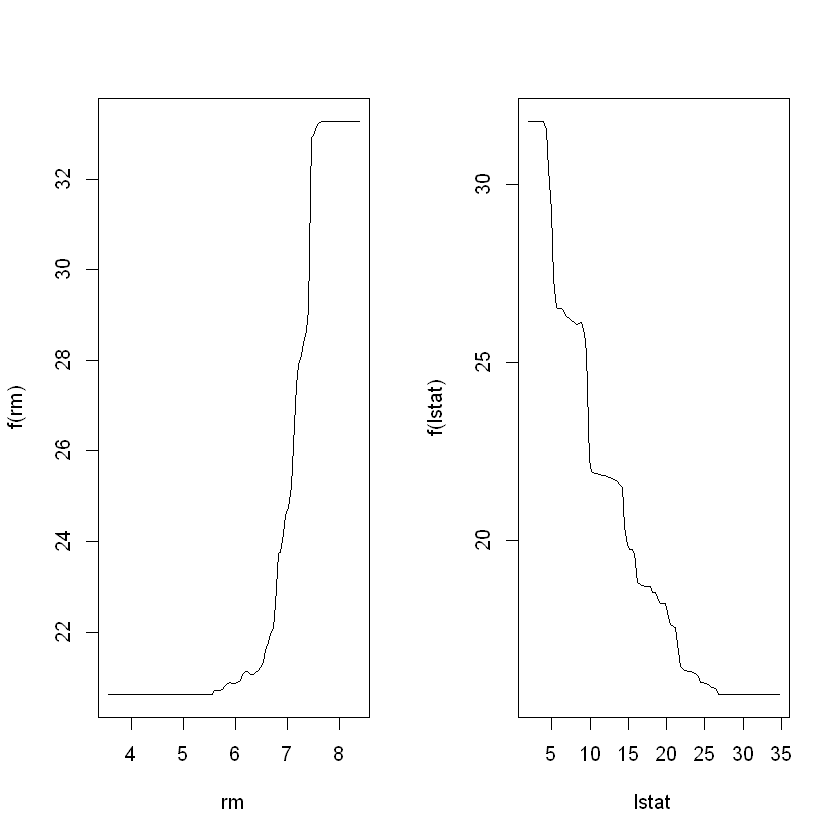

In [4]:
#partial dependence plots
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")


In [7]:
# predict
yhat=predict(boost.boston, newdata=Boston[-train,],n.trees=5000)
mean((yhat-Boston[-train,"medv"])^2)

[1] 11.84694

If we want to, we can perform boosting
with a different value of the shrinkage parameter λ in (8.10). The default
value is 0.001, but this is easily modified. Here we take λ = 0.2.

In [11]:
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boston=predict(boost.boston, newdata=Boston[-train,],n.trees=5000)
mean((yhat.boston-Boston[-train,"medv"])^2)

[1] 11.42312